<a href="https://colab.research.google.com/github/Arx15E/University-Proyects/blob/main/Caracterizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Gestion riesgo operacional - EVERGREEN**
Espacio de trabajo en el cual se plantean el analisis de los riesgos asociados a las operaciones del negocio de la naviera EVERGREEN. Esta naviera taiwanesa opera en 240 puertos alrededor del mundo utilizando 150 buques canal de panamá.

Los riesgos operacionales a los cuales esta expuesta la naviera estan relacionandos con logistica portuaria, y este se describe a traves de dos variables aleatorias:

* Frecuencia: Indica el número de contenedores que se quedan en tierra por semana(tiempo)

* Severidad(KUSD): Indica el costo de solucionar cada evento de riesgo.

Es importante mencionar que el producto entre la severidad y la frecuencia da como resultado la distribución agregada de las perdidas. (LDA - Loss Distribution Approach ) y es precisamente que se hara la caracterizacion de esta distribución utilizando las medidas de tendencia central( Media, Desviacion) y las medidas de dispersion (Coeficiente de simetria,kurtusis)



0. Cargar las librerias de trabajo

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Se cargan los archivos de trabajo

0        11.468562
1       128.418827
2        47.831980
3       162.867297
4       197.649353
           ...    
2799     10.453583
2800    106.315153
2801    100.971315
2802     25.253669
2803    101.806004
Length: 2804, dtype: float64


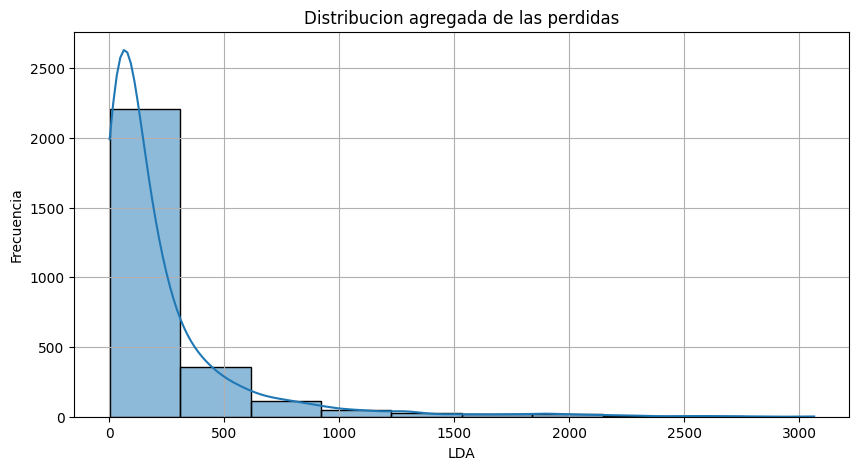

,Media,Varianza,Desviacion,Asimetria,Kurtosis
LDA,279.651095,102317.972226,319.871806,3.792311,17.131316


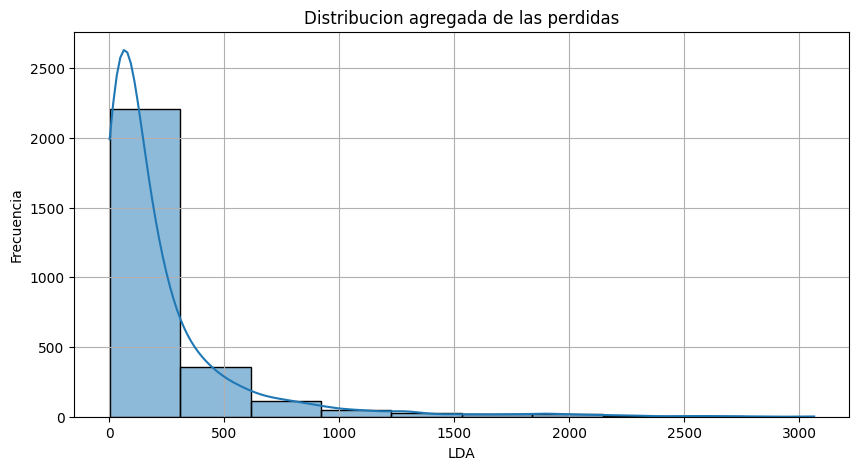

,Media,Varianza,Desviacion,Asimetria,Kurtosis
Frecuencia,23.900499,209.537789,14.47542,0.722883,-0.183635


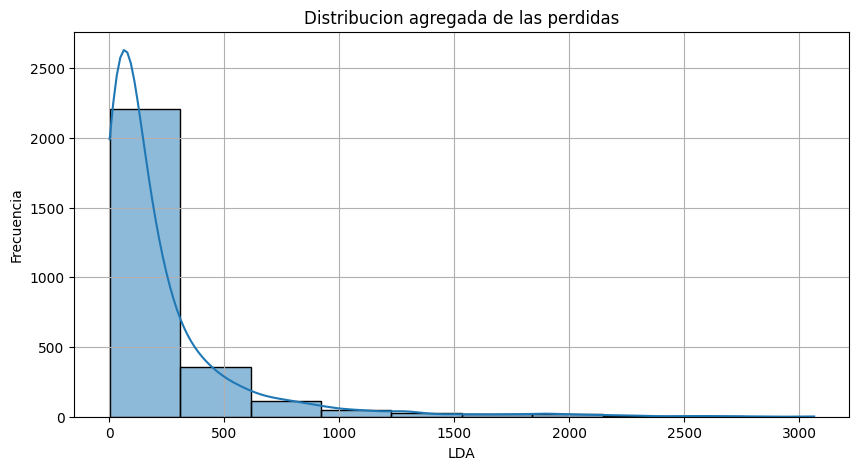

,Media,Varianza,Desviacion,Asimetria,Kurtosis
Severidad,10.350364,110.048337,10.490393,2.969909,11.342792


In [47]:
nxl='/content/drive/MyDrive/IntegraciónDatos/1. RiesgoOperacional_EVERGREEEN.xlsx'
datos = pd.read_excel(nxl, sheet_name=0)
datos.head(10)

# Procedemos con la construccion de la distribucion agregada de las perdidas
Freq=datos['Eventos (Semana)']
Sev=datos['Severidad (KUSD)']
LDA=Freq*Sev
print(LDA)


#procedemos con la caracterizacion de las variables aleatorias de frecuencia, severidad y LDA
p1,p2,p3,p4,p5=caracterizacion_VA(LDA)
Tbp=np.column_stack((p1,p2,p3,p4,p5))
dfp=pd.DataFrame(Tbp,columns=['Media','Varianza','Desviacion', 'Asimetria', 'Kurtosis'])
dfp.index = ['LDA']
display(dfp)

p1,p2,p3,p4,p5=caracterizacion_VA(Freq)
Tbp=np.column_stack((p1,p2,p3,p4,p5))
dfp=pd.DataFrame(Tbp,columns=['Media','Varianza','Desviacion', 'Asimetria', 'Kurtosis'])
dfp.index = ['Frecuencia']
display(dfp)

p1,p2,p3,p4,p5=caracterizacion_VA(Sev)
Tbp=np.column_stack((p1,p2,p3,p4,p5))
dfp=pd.DataFrame(Tbp,columns=['Media','Varianza','Desviacion', 'Asimetria', 'Kurtosis'])
dfp.index = ['Severidad']
display(dfp)

Coeficiente de asimetria mayor a 0

1.5 se crea el metodo para la caracterizcion de variables aleatorias (frecuencia, severidad, distribucion de las perdidas)

In [44]:
#creacion de metodo para la caracterizacion de variables
def caracterizacion_VA(x): #recibe una variable - propiedad del metodo

  #Se procede con la construccion de la distribucion agregada de las perdidas
  plt.figure(figsize=(10,5))
  sns.histplot(LDA, bins=10, kde=True)
  plt.grid()
  plt.xlabel('LDA')
  plt.ylabel('Frecuencia')
  plt.title('Distribucion agregada de las perdidas')
  plt.show()
  NI = 10  #indica el numero de clusters

  counts,bin_edges=np.histogram(x,bins=NI)
  XC=(bin_edges[:-1]+bin_edges[1:])/2
  prob = counts/np.sum(counts)

  #medidas de tendencia y dispercion
  u=np.sum(XC*prob)
  var=np.sum((XC-u)**2*prob)
  sigma=np.sqrt(var)
  CAs=np.sum((XC-u)**3*prob)/sigma**3
  Kur=(np.sum((XC-u)**4*prob)/sigma**4)-3

  return u,var,sigma,CAs,Kur # son propiedades del metodo

2. metodo de integracion1:metodo de montecarlo, es un metodo que utiliza una ruleta cargada, dependiendo de las probabilidades que genera el histograma




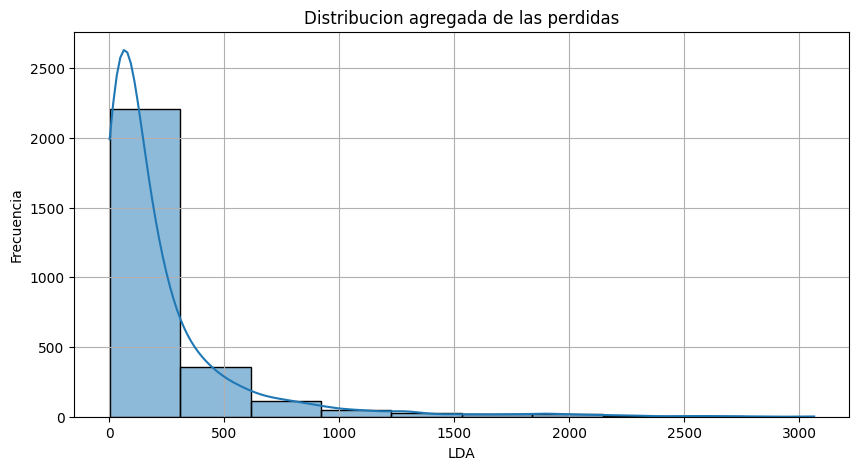

,Media,Varianza,Desviacion,Asimetria,Kurtosis
LDA,279.651095,102317.972226,319.871806,3.792311,17.131316


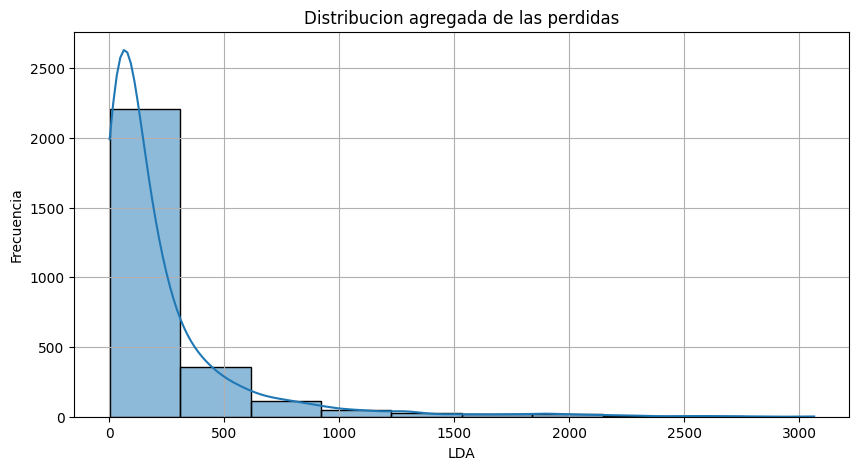

,Media,Varianza,Desviacion,Asimetria,Kurtosis
LDAm,274.32443,97476.176836,312.21175,4.012303,20.243467


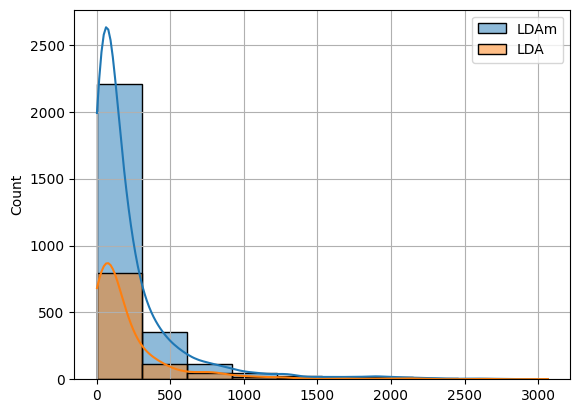

In [53]:
np.random.seed(42)
LDAm=LDA.sample(n=1000,replace=True)

#variable antes
p1,p2,p3,p4,p5=caracterizacion_VA(LDA)
Tdp=np.column_stack((p1,p2,p3,p4,p5))
dfp=pd.DataFrame(Tdp,columns=['Media','Varianza','Desviacion', 'Asimetria', 'Kurtosis'])
dfp.index = ['LDA']
display(dfp)
#variable despues
p1,p2,p3,p4,p5=caracterizacion_VA(LDAm)
Tdp=np.column_stack((p1,p2,p3,p4,p5))
dfp=pd.DataFrame(Tdp,columns=['Media','Varianza','Desviacion', 'Asimetria', 'Kurtosis'])
dfp.index = ['LDAm']
display(dfp)

#Para vizualizar los dos graficos en una sola grafica
plt.figure()
sns.histplot(LDA, bins=10, kde=True, label='LDAm')
sns.histplot(LDAm, bins=10, kde=True, label='LDA')
plt.grid()
plt.legend()
plt.show()

2. se procede con la clusterizacion estadistica. esta esta definida por el histograma de frecuencias

In [22]:
np.set_printoptions(suppress=True)
NI = 10  #indica el numero de clusters

counts,bin_edges=np.histogram(LDA,bins=NI)
print("El numero de datos por intervalo es:")
print(counts)
print("Los intervalos inferiores: ")
print(bin_edges[:-1])
print("Los intervalos superiores: ")
print(bin_edges[1:])
XC=(bin_edges[:-1]+bin_edges[1:])/2
prob = counts/np.sum(counts)

#medidas de tendencia y dispercion
u=np.sum(XC*prob)
print("La media es: ",u)
var=np.sum((XC-u)**2*prob)
print("La varianza es: ",var)
sigma=np.sqrt(var)
print("La desviacion es: ",sigma)
CAs=np.sum((XC-u)**3*prob)/sigma**3
print("El coeficiente de asimetria es: ",CAs)
Kur=(np.sum((XC-u)**4*prob)/sigma**4)-3
print("El coeficiente de curtosis es: ",Kur)


#Se configura la tabla
Tabla=np.column_stack((bin_edges[:-1],bin_edges[1:],XC,counts,prob))
df=pd.DataFrame(Tabla,columns=["LI", "LS","XC","ND","Prob"])
df.head(10)

La media es:  279.6510949925361
La varianza es:  102317.97222569383
La desviacion es:  319.87180592495775
El coeficiente de asimetria es:  3.792311305904773
El coeficiente de curtosis es:  17.131316115151854


3. se calculan la tendencia central y dispersion, media, desviacion, asimetria y kurtosis

In [4]:
from scipy.stats import kurtosis, skew

u=np.mean(LDA)
var=np.var(LDA)
sigma=np.std(LDA)
Ida_skew = skew(LDA)
Ida_kurt = kurtosis(LDA)

T2=np.column_stack((u,var,sigma, Ida_skew, Ida_kurt))
df2=pd.DataFrame(T2,columns=["Media","Varianza","Desviacion", "Asimetria", "Kurtosis"])
df2.head(10)

,Media,Varianza,Desviacion,Asimetria,Kurtosis
0,231.266602,115581.511672,339.97281,3.389058,14.577132


**Analisis de resultados**

De las metricas de tendencia central y dispersion, podemos observar que los datos tienen la tendencia a ubicarse por debajo de la media como lo muestra el coeficiente de asimetria(3.389058) , el cual esta por encima de la unidad, lo que indica que en general las perdidas por dejar contenedores en tierra son perdidas menores( no asegurables). por su parte el coeficiente de curtosis, muestra que los datos se encuentran muy concentrados al lado izquierdo de la media de la distribucion de perdidas, tal y como se puede observar en la grafica del histograma de frecuencias, esto refuerza la idea de menores perdidas
